## 日立埋め込み論文
### 奥山ほか、イジング計算機に向けたグラフ埋め込みアルゴリズム、信学技法 COMP2016-11

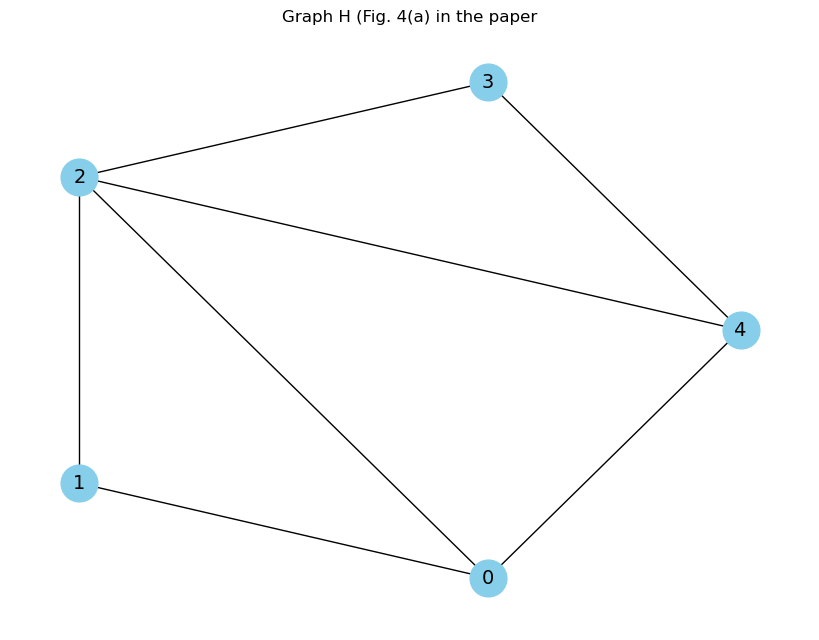

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# 論文の図4(a)のグラフ

G = nx.Graph()  # 有向グラフ (Directed Graph)

# ノードの追加
G.add_nodes_from([0, 1, 2, 3, 4])

# エッジの追加
G.add_edges_from([(0, 1), (0, 2), (0, 4), (1, 2), (2, 3), (2, 4), (3, 4)])

# PyGraphvizのcircoレイアウトを使用してノードの位置を計算
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='circo')

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=14, font_color='black')
plt.title('Graph H (Fig. 4(a) in the paper')
plt.show()

### キンググラフの描画

### 属性の追加
上で生成されたグラフのノードは「位置情報」のみを持っている。
埋め込みを実現するために value 属性を追加する。value は元のグラフ（グラフH）のノード番号。

### 初期値
第 0 行目：y座標（列番号）

第 1 行目以降

- $x+y$ が偶数の場合
$(x-1, \max(0, y-1)$ の value 値
- $x+y$ が奇数の場合
$(x-1, \min(n-1, y+1)$ の value 値

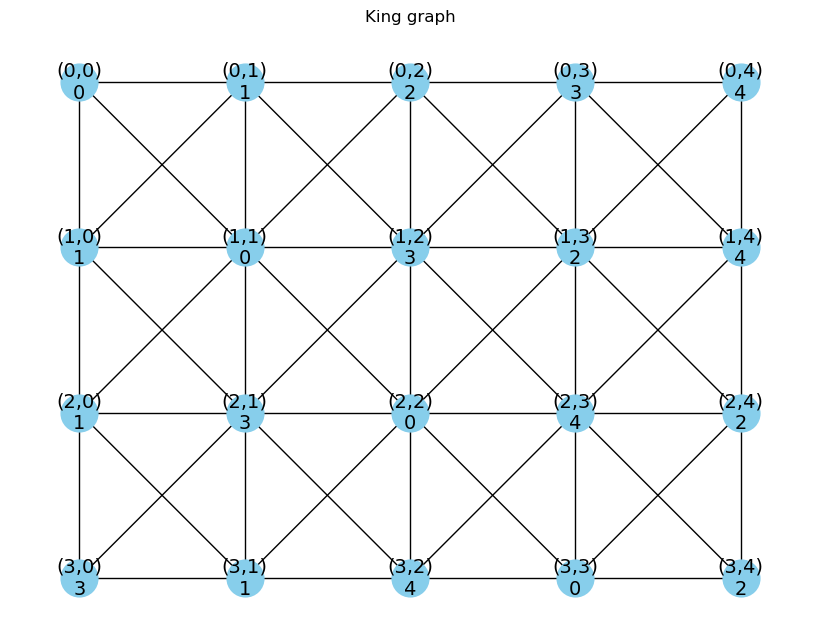

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# n: 元のグラフのノード数
n = 5

# グラフを作成
K = nx.grid_2d_graph(n-1, n)  # 横x縦の格子グラフを作成

# 斜め方向のエッジを追加
for x, y in K.nodes():
    if (x+1, y+1) in K.nodes():
        K.add_edge((x, y), (x+1, y+1))
    if (x+1, y-1) in K.nodes():
        K.add_edge((x, y), (x+1, y-1))

# ノード位置を格子状に設定
# yを横、-xを縦にすることで正しい表現（行, 列）になる
pos = {(x, y): (y, -x) for x, y in K.nodes()}

# グラフ K に pos 属性を追加
nx.set_node_attributes(K, pos, 'pos')

for x, y in K.nodes():
    if x == 0: # 第0行の場合
        K.nodes[(x, y)]['value'] = y
    else:
        # x+yが偶数の場合
        if (x + y) % 2 == 0:
            K.nodes[(x,y)]['value'] = K.nodes[(x-1, max(0, y-1))]['value']
        # x+yが奇数の場合
        else:
            K.nodes[(x,y)]['value'] = K.nodes[(x-1, min(n-1,y+1))]['value']

# # ノードラベルを設定
# labels = {(x, y): f"{K.nodes[(x, y)].get('value', '')}" for x, y in K.nodes()}
labels = {(x, y): f"({x},{y})\n{K.nodes[(x, y)]['value']}" for x, y in K.nodes()}

# 格子状レイアウトでグラフを描画
def Show_KingGraph(K, pos, labels):
    plt.figure(figsize=(8, 6))
    nx.draw(K, pos, labels=labels, with_labels=True, node_size=700, node_color='skyblue', font_size=14, font_color='black')
    plt.title('King graph')
    plt.show()
    
Show_KingGraph(K, pos, labels)


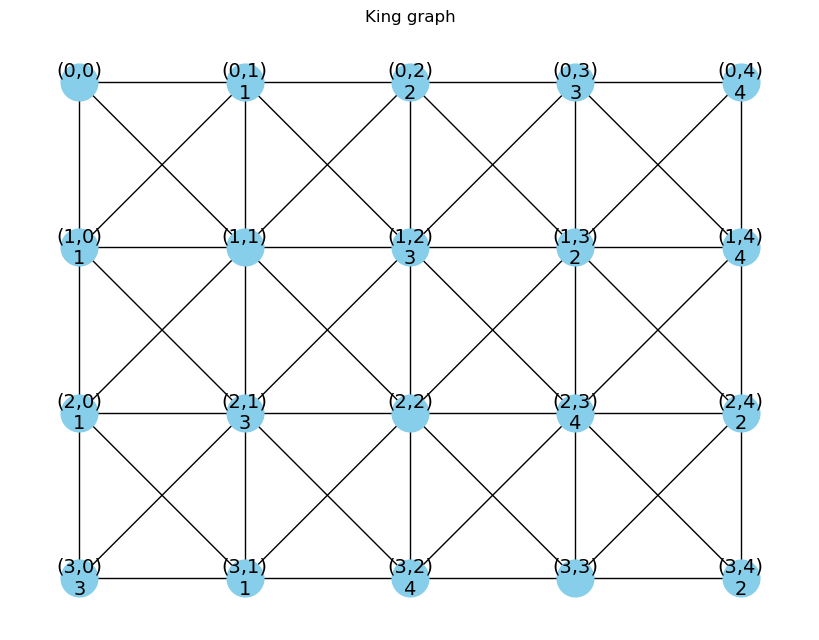

In [31]:
###############################################################
# ノードの value 値に基づく分類
val_grp = defaultdict(set)
for node in K.nodes():
    val = K.nodes[node]['value']
    val_grp[val].add(node)

# for gnode in G.nodes(): # 5行目
gnode = 0
for node in val_grp[gnode]: # 6行目
    K.nodes[node]['value'] = ''

# neighbors = list(G.neighbors(gnode))
# for nb in neighbors:
#     print(nb)

labels = {(x, y): f"({x},{y})\n{K.nodes[(x, y)]['value']}" for x, y in K.nodes()}
Show_KingGraph(K, pos, labels)

